In [38]:
import time
import numpy as np 
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
from konlpy.tag import Okt
import re, nltk


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


import os
driver_name = os.environ['HOMEDRIVE'] + os.environ['HOMEPATH'] + '\\downloads\\chromedriver.exe'



In [3]:
naver_url = 'https://sports.news.naver.com/ranking/index.nhn?date='

In [83]:
# 테스트 해 보기  
# 테그 CSS Selector 방법1
today =  datetime.now() # 오늘 날짜
day_count = 20   # 몇 일을 가져올 것인지

count = 0
driver = webdriver.Chrome(driver_name)

sports = []

while True:     # 가져올 날짜 수 
    get_day = today.strftime('%Y%m%d')

    # 네이버 스포츠 랭킹 URL
    url = naver_url + get_day
    driver.get(url)
    time.sleep(2)

    # 제목가져오기 1
    titles = driver.find_elements(By.CSS_SELECTOR, '#_newsList > ul > li > .text > a > span ')
    # print(len(titles))

    # for title in news:
    #     print(title.text.strip())

    for title in titles:
        sports.append(title.text.strip())        

    if count >= day_count: break

    today = today - timedelta(1) # 1 day 씩 뺀다.
    count += 1
    
driver.close()  

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


In [84]:
# 테스트 해 보기  
# 테그 CSS Selector 방법2
today =  datetime.now() # 오늘 날짜
day_count = 20   # 몇 일을 가져올 것인지

count = 0
driver = webdriver.Chrome(driver_name)

sports = []

while True:     # 가져올 날짜 수 
    get_day = today.strftime('%Y%m%d')

    # 네이버 스포츠 랭킹 URL
    url = naver_url + get_day
    driver.get(url)
    time.sleep(2)

    # 제목가져오기 2
    news = driver.find_element(By.CSS_SELECTOR, '#_newsList')
    titles = news.find_elements(By.CLASS_NAME, 'title')
    # print(len(titles))   


    # for title in titles:
    #     print(title.text.strip())

    for title in titles:
        sports.append(title.text.strip())        

    if count >= day_count: break

    today = today - timedelta(1) # 1 day 씩 뺀다.
    count += 1
    
driver.close()  

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


- CSS_SELECTOR 로 한 번에 가져오는 것이 더 속도가 좋은 것 같다.

In [86]:
today =  datetime.now() # 오늘 날짜
day_count = 20  # 가져올 날짜 수 

count = 0
driver = webdriver.Chrome(driver_name)

sports = []

while True:     
    get_day = today.strftime('%Y%m%d')

    # 네이버 스포츠 랭킹 URL
    url = naver_url + get_day
    driver.get(url)
    time.sleep(2)

    # 제목가져오기
    titles = driver.find_elements(By.CSS_SELECTOR, '#_newsList > ul > li > .text > a > span ')
    # print(len(titles))   

    for title in titles:
        sports.append(title.text.strip())        

    if count >= day_count: break

    today = today - timedelta(1) # 1 day 씩 뺀다.
    count += 1
    
driver.close()  


In [87]:
len(sports)

420

In [88]:
text = ' '.join(sports)

In [89]:
text[:200]

'이강인 EPL 아닌 \'라리가 잔류\' 가능성 "ATM 시메오네 감독 영입 승인, 매우 단호" 논란 배제+신예 중심+아마 포함, AG 대표팀 확 바뀐다 [MK초점] 미용실에서 샴푸하다 트레이드→대구행→첫 SV…"이제 자야죠" 발렌시아 방출 설움 견뎠다…이강인 \'연봉 잭팟\' 예고 와일드카드도 젊게…1년 사이 확 바뀐 항저우AG 야구 예비 명단 "맨시티서 행복하지'

In [90]:
okt = Okt()
tokens = okt.nouns(text)
tokens[:4]

['이강인', '라리가', '잔류', '가능성']

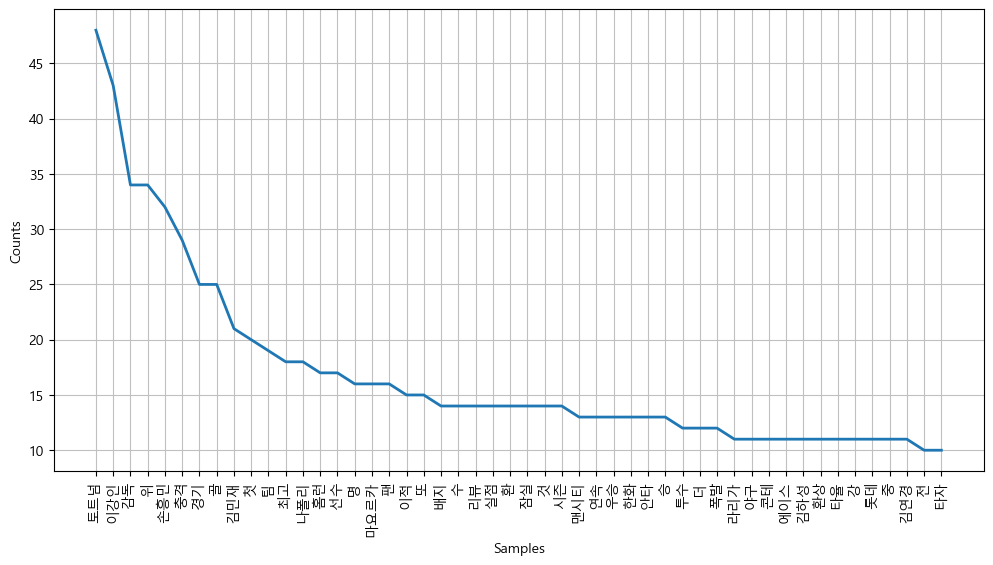

In [94]:
gift = nltk.Text(tokens, name='Sports뉴스')
plt.figure(figsize=(12, 6))
gift.plot(50);

In [92]:
new_tokens = [word for word in tokens]

In [95]:
stoptext="""
    감독 위 첫 명 팀 선수 환 또 리뷰 것 승 투수 수 더 강 중 전 
    팬 세 이 최 패 설 점 행
"""

stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['이강인', '라리가', '잔류', '가능성', '시메오네', '입', '승인', '매우', '단호', '논란']

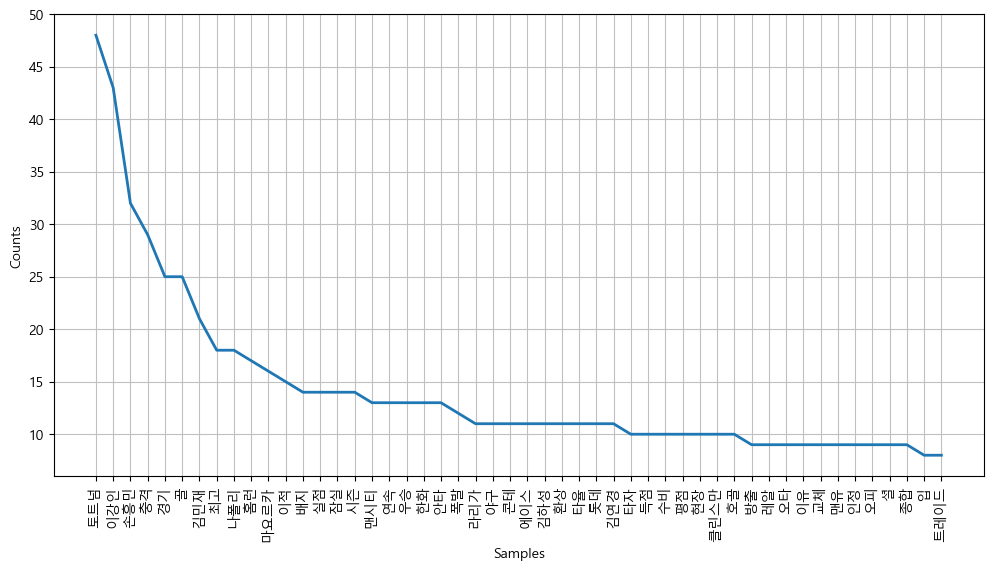

In [96]:
news = nltk.Text(new_tokens, name='Sports뉴스')
plt.figure(figsize=(12, 6))
news.plot(50);

In [97]:
len(new_tokens)

3526

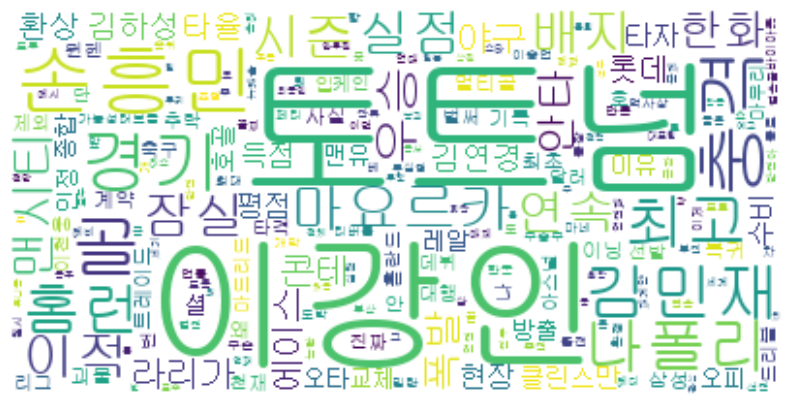

In [98]:
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='C:/Windows/Fonts/NGULIM.TTF'
).generate_from_frequencies(dict(news.vocab().most_common(300)))

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

plt.show()

In [99]:
from wordcloud import ImageColorGenerator
from PIL import Image

mask = np.array(Image.open('data/sport.jpg'))

image_colors = ImageColorGenerator(mask)

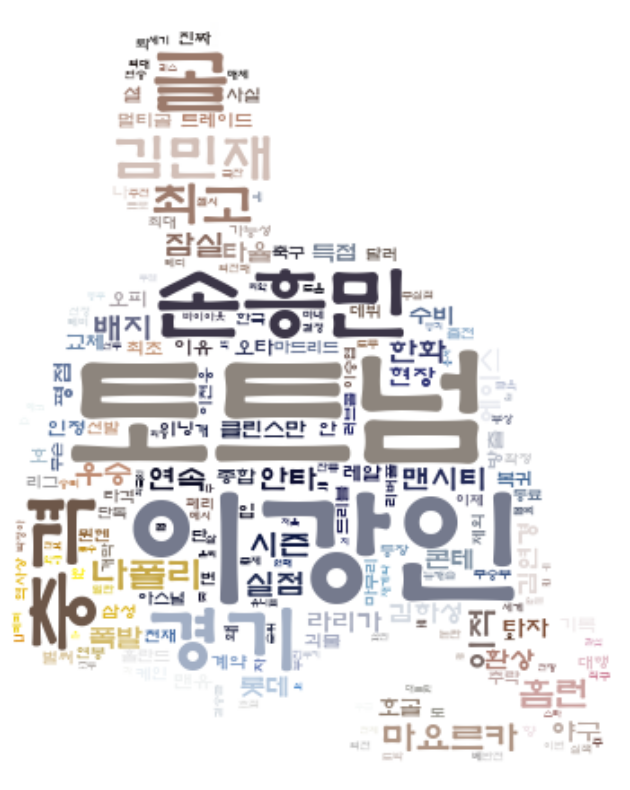

In [100]:
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='C:/windows/Fonts/HMFMOLD.TTF',
    # relative_scaling=0.2,
    mask=mask
).generate_from_frequencies(dict(news.vocab().most_common(300)))

plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

- 스포츠 종목별로 모아보기

In [130]:
base_url = 'https://sports.news.naver.com/index'
driver = webdriver.Chrome(driver_name)

# 네이버 스포츠 MainPage
url = base_url
driver.get(url)
time.sleep(1)

lis = driver.find_elements(By.CLASS_NAME, 'link_lnb')
print(len(lis))
# 야구, 해외야구, 축구, 해외축구, 농구, 배구, 골프, 일반
events = []
for li in lis[1:9]:
    events.append(li.get_attribute('href'))


newss = []
for event in events[:1]:
    driver.get(event)
    time.sleep(2)
    
    curs = driver.find_elements(By.CSS_SELECTOR, '#lnb_sub_list > li > a')
    if curs:
        newss.append(curs[0].get_attribute('href'))


# 종목별 최신뉴스 개수 가져오기
for news in newss[:1]:
    driver.get(news)
    time.sleep(2)

    # 다음 버튼이 찾기
    next_page = True

    while next_page:

        next_page = False

        pages = driver.find_elements(By.CSS_SELECTOR, '#_pageList > a')
        print('pages', len('pages'))
        for page in pages:

            # 다음 찾기            
            if page.get_attribute('data-id'):
                href = page.get_attribute('href').replace('N#', page.get_attribute('data-id'))
                print(href)                
            else:
                print('click')
                page.click()
                time.sleep(2)
                next_page = True

                # 페이지가 바뀐다.



# driver.close()


13
pages 5
https://sports.news.naver.com/kbaseball/news/index?isphoto=2
https://sports.news.naver.com/kbaseball/news/index?isphoto=3
https://sports.news.naver.com/kbaseball/news/index?isphoto=4
https://sports.news.naver.com/kbaseball/news/index?isphoto=5
https://sports.news.naver.com/kbaseball/news/index?isphoto=6
https://sports.news.naver.com/kbaseball/news/index?isphoto=7
https://sports.news.naver.com/kbaseball/news/index?isphoto=8
https://sports.news.naver.com/kbaseball/news/index?isphoto=9
https://sports.news.naver.com/kbaseball/news/index?isphoto=10
click
pages 5
click


StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=112.0.5615.138)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x0099DCE3+50899]
	(No symbol) [0x0092E111]
	(No symbol) [0x00835588]
	(No symbol) [0x00837EDB]
	(No symbol) [0x00837DB0]
	(No symbol) [0x00838690]
	(No symbol) [0x0088E98D]
	(No symbol) [0x0087B8FC]
	(No symbol) [0x0088E01C]
	(No symbol) [0x0087B6F6]
	(No symbol) [0x00857708]
	(No symbol) [0x0085886D]
	GetHandleVerifier [0x00C03EAE+2566302]
	GetHandleVerifier [0x00C392B1+2784417]
	GetHandleVerifier [0x00C3327C+2759788]
	GetHandleVerifier [0x00A35740+672048]
	(No symbol) [0x00938872]
	(No symbol) [0x009341C8]
	(No symbol) [0x009342AB]
	(No symbol) [0x009271B7]
	BaseThreadInitThunk [0x76830099+25]
	RtlGetAppContainerNamedObjectPath [0x77AA7B6E+286]
	RtlGetAppContainerNamedObjectPath [0x77AA7B3E+238]
